In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from SG

In [64]:
df = pd.read_csv('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/Irece/sg_irece.csv',low_memory=False)

In [ ]:
df.head()

In [65]:
df['ones'] = 1

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32855 entries, 0 to 32854
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32855 non-null  object 
 1   estadoNotificacao         32855 non-null  object 
 2   estadoNotificacaoIBGE     1805 non-null   object 
 3   municipioNotificacao      32847 non-null  object 
 4   municipioNotificacaoIBGE  1805 non-null   float64
 5   profissionalSaude         32848 non-null  object 
 6   profissionalSeguranca     32663 non-null  object 
 7   cbo                       2763 non-null   object 
 8   sexo                      32855 non-null  int64  
 9   racaCor                   32517 non-null  object 
 10  estado                    32849 non-null  object 
 11  estadoIBGE                14317 non-null  object 
 12  municipio                 32855 non-null  object 
 13  municipioIBGE             32855 non-null  int64  
 14  dataNo

In [ ]:
df.filter(['estado','estadoIBGE', 'municipio', 'municipioIBGE']).head()

In [ ]:
df.filter(['dataInicioSintomas','dataNotificacao', 'dataTeste']).head()

## Contagens de casos 

In [ ]:
df.filter(['estadoTeste', 'dataTeste', 'tipoTeste', 'resultadoTeste',
       'classificacaoFinal', 'evolucaoCaso',])

### Padronização

In [66]:
df.estadoTeste=df.estadoTeste.replace({'Concluído': 0, 'Coletado': 1, 'Solicitado':2,'Exame Não Solicitado':3})

df.tipoTeste=df.tipoTeste.replace({'RT-PCR': 0, 'TESTE RÁPIDO - ANTICORPO': 1, 'TESTE RÁPIDO - ANTÍGENO':2,
                                   'Enzimaimunoensaio - ELISA IgM':3,'Quimioluminescência - CLIA':4,
                                  'Imunoensaio por Eletroquimioluminescência - ECLIA IgG':5,
                                  'Enzimaimunoensaio – ELISA':6})

df.resultadoTeste=df.resultadoTeste.replace({'Negativo': 0, 'Positivo': 1, 'Inconclusivo ou Indeterminado':88})

df.classificacaoFinal=df.classificacaoFinal.replace({'Descartado': 0, 'Confirmado Laboratorial': 1,
                                                     'Síndrome Gripal Não Especificada':2,
                                                     'Confirmado Clínico-Imagem':3,
                                                    'Confirmado Clínico-Epidemiológico':4,
                                                    'Confirmado por Critério Clínico':5})

df.evolucaoCaso = df.evolucaoCaso.replace({'Cura': 0, 'Cancelado': 1, 'Em tratamento domiciliar':2,
                                           'Óbito':3,'Ignorado':1,'Internado':4,'Internado em UTI':5})

df.sexo = df.sexo.replace({'Feminino': 0, 'Masculino': 1})

df.estadoTeste=df.estadoTeste.fillna(99)
df.tipoTeste=df.tipoTeste.fillna(99)
df.resultadoTeste=df.resultadoTeste.fillna(99)
df.classificacaoFinal=df.classificacaoFinal.fillna(99)
df.evolucaoCaso=df.evolucaoCaso.fillna(99)
df.sexo=df.sexo.fillna(99)

#df['idade']= df['idade'].mask(df2['idade']<18, '0-17','0-17')

df.loc[(df.idade <18), 'faixa']='0-17'
df.loc[((df.idade <30)&(df.idade >=18)), 'faixa']='18-29'
df.loc[((df.idade <40)&(df.idade >=30)), 'faixa']='30-39'
df.loc[((df.idade <50)&(df.idade >=40)), 'faixa']='40-49'
df.loc[((df.idade <65)&(df.idade >=50)), 'faixa']='50-64'
df.loc[((df.idade <75)&(df.idade >=65)), 'faixa']='65-74'
df.loc[((df.idade <85)&(df.idade >=75)), 'faixa']='75-84'
df.loc[(df.idade >=85), 'faixa']='85+'

In [76]:
df['faixa'].value_counts()

30-39    7435
18-29    7386
40-49    6325
50-64    4817
0-17     4546
65-74    1331
75-84     721
85+       293
Name: faixa, dtype: int64

In [39]:
df.idade.value_counts()

Series([], Name: idade, dtype: int64)

In [6]:
df.sexo.value_counts()

0    18165
1    14690
Name: sexo, dtype: int64

In [7]:
df.estadoTeste.value_counts()

0.0     28910
99.0     1812
1.0       802
2.0       712
3.0       619
Name: estadoTeste, dtype: int64

In [9]:
# Porcentagem de caso suspeitos testados (estadoTeste = 0)*100/total de casos suspeitos 
28910*100/32855

87.99269517577233

In [8]:
df.tipoTeste.value_counts()

0.0     19034
1.0      6847
2.0      4038
99.0     2909
3.0        10
4.0         9
5.0         7
6.0         1
Name: tipoTeste, dtype: int64

In [10]:
df.resultadoTeste.value_counts()

0.0     19251
1.0      9464
99.0     4055
88.0       85
Name: resultadoTeste, dtype: int64

In [11]:
df.classificacaoFinal.value_counts()

0.0     19473
1.0      9462
99.0     2367
2.0      1532
3.0        11
4.0         7
5.0         3
Name: classificacaoFinal, dtype: int64

In [12]:
df.evolucaoCaso.value_counts()

0.0     29354
99.0     1992
1.0       797
2.0       449
3.0       179
4.0        79
5.0         5
Name: evolucaoCaso, dtype: int64

In [80]:
# Correção da variável classificação final considerando os valores positivos dos testes
df['classificacaoFinal'] = np.where(df['resultadoTeste'] ==1, 1, df['classificacaoFinal'])

In [81]:
data = df.groupby(['tipoTeste','estadoTeste','resultadoTeste','classificacaoFinal'])['ones'].count().reset_index()

In [82]:
# Contar casos que deram positivos na classificação final ou pelo teste

data[(data.classificacaoFinal != 0) & (data.classificacaoFinal != 99)].ones.sum()

#data[(data.classificacaoFinal == 0) & (data.resultadoTeste == 1)].ones.sum()
#data[(data.classificacaoFinal == 99) & (data.resultadoTeste == 1)].ones.sum()

11372

# Analises dos casos confirmados

In [83]:
df2 = df[(df.classificacaoFinal != 0) & (df.classificacaoFinal != 99)] #.ones.sum()

In [84]:
df2

,id,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,profissionalSaude,profissionalSeguranca,cbo,sexo,racaCor,...,dataTeste,tipoTeste,resultadoTeste,classificacaoFinal,evolucaoCaso,dataEncerramento,cnes,idade,ones,faixa
16,GcDEf0OynQ,Bahia,NaN,Irecê,NaN,Não,Não,NaN,0,Parda,...,NaN,0.0,1.0,1.0,0.0,2020-12-23,NaN,29.0,1,18-29
28,h2WlTSonVU,Bahia,NaN,Irecê,NaN,Não,Não,NaN,1,Parda,...,NaN,99.0,99.0,2.0,0.0,2020-07-25,NaN,52.0,1,50-64
29,VjAEBQGNcV,Bahia,NaN,Irecê,NaN,Não,Não,NaN,0,Parda,...,NaN,99.0,99.0,2.0,0.0,2020-07-25,NaN,27.0,1,18-29
33,Q8ja04hoYC,Bahia,NaN,Salvador,NaN,Não,Não,NaN,1,Amarela,...,NaN,99.0,99.0,2.0,1.0,2020-07-30,4073.0,79.0,1,75-84
36,OXuDs0wZ4k,Bahia,NaN,Irecê,NaN,Não,Não,NaN,1,Amarela,...,NaN,99.0,99.0,2.0,0.0,2020-08-18,NaN,18.0,1,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32833,lgtCdFuX49,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,0,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-24,6249817.0,55.0,1,50-64
32834,iBLqwk9HLu,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,1,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-24,6249817.0,42.0,1,40-49
32835,7CWWNoEGBI,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,0,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-25,6249817.0,38.0,1,30-39
32837,T8O95JmkRx,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,0,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-26,6249817.0,33.0,1,30-39


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11372 entries, 16 to 32854
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11372 non-null  object 
 1   estadoNotificacao         11372 non-null  object 
 2   estadoNotificacaoIBGE     209 non-null    object 
 3   municipioNotificacao      11372 non-null  object 
 4   municipioNotificacaoIBGE  209 non-null    float64
 5   profissionalSaude         11372 non-null  object 
 6   profissionalSeguranca     11357 non-null  object 
 7   cbo                       468 non-null    object 
 8   sexo                      11372 non-null  int64  
 9   racaCor                   11363 non-null  object 
 10  estado                    11372 non-null  object 
 11  estadoIBGE                5959 non-null   object 
 12  municipio                 11372 non-null  object 
 13  municipioIBGE             11372 non-null  int64  
 14  dataN

In [19]:
df2.evolucaoCaso.value_counts()

0.0     10423
2.0       442
99.0      235
3.0       157
1.0        98
4.0        15
5.0         2
Name: evolucaoCaso, dtype: int64

In [20]:
df2.filter(['dataInicioSintomas','dataNotificacao', 'dataTeste']).head()

,dataInicioSintomas,dataNotificacao,dataTeste
16,2020-06-12,2020-06-16,NaN
28,2020-07-15,2020-07-23,NaN
29,2020-07-20,2020-07-23,NaN
33,2020-07-24,2020-07-31,NaN
36,2020-07-25,2020-08-03,NaN


In [21]:
# Correção da variável data de primeiros sintomas considerando os valores da data de notificação

df2['dataInicioSintomas']= np.where(df2['dataInicioSintomas'].isnull(), df2['dataNotificacao'], df2['dataInicioSintomas'])

#df['col1'] = np.where(df['col1'] == 0, df['col2'], df['col1'])

<ipython-input-21-67dcf83ceec8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dataInicioSintomas']= np.where(df2['dataInicioSintomas'].isnull(), df2['dataNotificacao'], df2['dataInicioSintomas'])


In [22]:
df2['dataInicioSintomas'] = pd.to_datetime(df2['dataInicioSintomas'])

<ipython-input-22-cf3717d7f31e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dataInicioSintomas'] = pd.to_datetime(df2['dataInicioSintomas'])


In [23]:
series =df2.groupby(['dataInicioSintomas'])['ones'].sum().reset_index()

In [24]:
series

,dataInicioSintomas,ones
0,2020-02-18,1
1,2020-02-27,1
2,2020-03-18,1
3,2020-03-25,1
4,2020-04-07,1
...,...,...
549,2021-11-30,4
550,2021-12-04,1
551,2021-12-05,1
552,2021-12-06,1


In [25]:
series['week'] = series['dataInicioSintomas'].dt.strftime('%Y-%U')

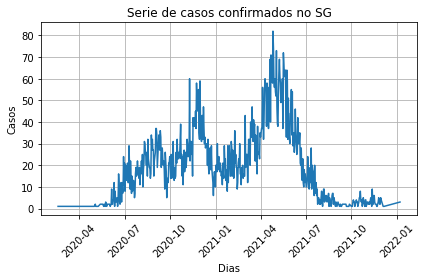

In [26]:
plt.plot(series.dataInicioSintomas,series.ones)
plt.xticks(rotation=45)

plt.xlabel("Dias")

plt.ylabel("Casos")

plt.title('Serie de casos confirmados no SG')

plt.grid()

plt.tight_layout()

In [27]:
series2 = series.groupby(['week'])['ones'].sum().reset_index()

In [28]:
series2

,week,ones
0,2020-07,1
1,2020-08,1
2,2020-11,1
3,2020-12,1
4,2020-14,2
...,...,...
89,2021-46,23
90,2021-47,17
91,2021-48,12
92,2021-49,2


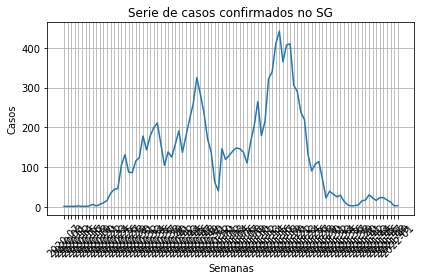

In [29]:
plt.plot(series2.week,series2.ones)

plt.xticks(rotation=45)

plt.xlabel("Semanas")

plt.ylabel("Casos")

plt.title('Serie de casos confirmados no SG')

plt.grid()

plt.tight_layout()

# Contagem das categorias por casos confirmados

In [30]:
df2.sexo.value_counts()

0    6190
1    5182
Name: sexo, dtype: int64

In [33]:
6190*100/11372

54.43193809356314

In [32]:
5182*100/11372

45.56806190643686

In [89]:
dta = df2['faixa'].value_counts().reset_index()

In [93]:
dta['perc'] = round(dta.faixa*100/11372,2)

In [94]:
dta

,index,faixa,perc
0,30-39,2631,23.14
1,18-29,2536,22.30
2,40-49,2215,19.48
3,50-64,1825,16.05
4,0-17,1264,11.12
5,65-74,507,4.46
6,75-84,286,2.51
7,85+,108,0.95


In [96]:
dta.perc.sum()

100.00999999999999